In [122]:
import pandas as pd
import statistics
from matplotlib import pyplot as plt

import numpy as np
import sklearn.linear_model as skl
from sklearn.metrics import r2_score

from scipy import stats as st

In [70]:
def traslazione(data) : 
    copia = data
    filtro_post = copia[copia.iloc[: , 0] < 1961].index
    filtro_pre = copia[copia.iloc[: , 0] > 1990].index

    dati_medi = copia.drop(filtro_pre)
    dati_medi.drop(filtro_post , inplace= True)

    dati_traslati = copia
    dati_traslati.iloc[: ,1] = dati_traslati.iloc[: , 1] - dati_medi.iloc[: , 1].mean()

    #Tagliato per inizio uguale (da capire)
    filtro_post = copia[copia.iloc[:,  0] < 1891].index
    dati_traslati.drop(filtro_post  , inplace = True)

    return dati_traslati

In [71]:
#LETTURA NASA
totale = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/GLB.Ts+dSST.csv"  ,  header = 1)
col = ['Year', "Jan", "Feb" ,"Mar", "Apr", "May" ,"Jun", "Jul", "Aug" ,"Sep", "Oct" ,"Nov" ,"Dec"]
totale[col] = totale[col].apply(pd.to_numeric  , errors = 'coerce')

#Anni
Anni = totale['Year']

#medie per ano
totale.drop(['Year'  , 'J-D' ,  'DJF'  , 'MAM' ,  'JJA'  , 'SON'  , 'D-N'] ,  axis = 1  , inplace= True)
medie = totale.mean(axis = 1  , skipna= True ,  numeric_only= True)

#devstd
devstd = totale.T.std()

#DataFrame
totale = {'Year' : Anni  , 'Median' : medie  ,  'Devstd' : devstd}
Nasa = pd.DataFrame(totale)

#LETTURA HAD
Had = pd.read_csv("/home/francesco/Codici/Computazionale/dc0/HadCRUT.5.0.1.0.analysis.summary_series.global.annual.csv" ,  header = 0 )

#LETTURA NOAA
Noaa = pd.read_csv('/home/francesco/Codici/Computazionale/dc0/data.csv' ,  header = 4)

#LETTURA JAPAN
Japan = pd.read_csv('/home/francesco/Codici/Computazionale/dc0/year_wld.csv')

#LETTURA BERKELEY
indice = ['Year' , 'Annual Anomaly' , 'Annual Unc.' , 'Five-year Anomaly' , 'Five-year Unc.' , 'Annual Anomaly Under' , 'Annual Unc. Under' , 'Five-year Anomaly Under' , 'Five-year Unc. Under']
Berkeley = pd.read_fwf('/home/francesco/Codici/Computazionale/dc0/Land_and_Ocean_summary.txt'  , header = None  , names = indice , skiprows = 57 )

Nasa_copia = Nasa
Japan_copia = Japan
Noaa_copia = Noaa
Had_copia = Had
Berkeley_copia = Berkeley

Nasa_fixed = traslazione(Nasa)
Japan_fixed = traslazione(Japan)
Noaa_fixed = traslazione(Noaa)
Had_fixed = traslazione(Had)
Berkeley_fixed = traslazione(Berkeley)

Nasa = Nasa_copia
Japan = Japan_copia
Noaa = Noaa_copia
Berkeley = Berkeley_copia
Had = Had_copia

In [72]:
def taglio(data) : 
    filtro_pre = data[data.iloc[:, 0] > 1975].index
    pre = data.drop(filtro_pre)

    filtro_post = data[data.iloc[: ,0] < 1975].index
    post = data.drop(filtro_post)

    return pre ,  post

In [73]:
Had_pre  , Had_post = taglio(Had_fixed)
Noaa_pre  , Noaa_post = taglio(Noaa_fixed)
Japan_pre  , Japan_post = taglio(Japan_fixed)
Nasa_pre  , Nasa_post = taglio(Nasa_fixed)
Berkeley_pre ,  Berkeley_post = taglio(Berkeley_fixed)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


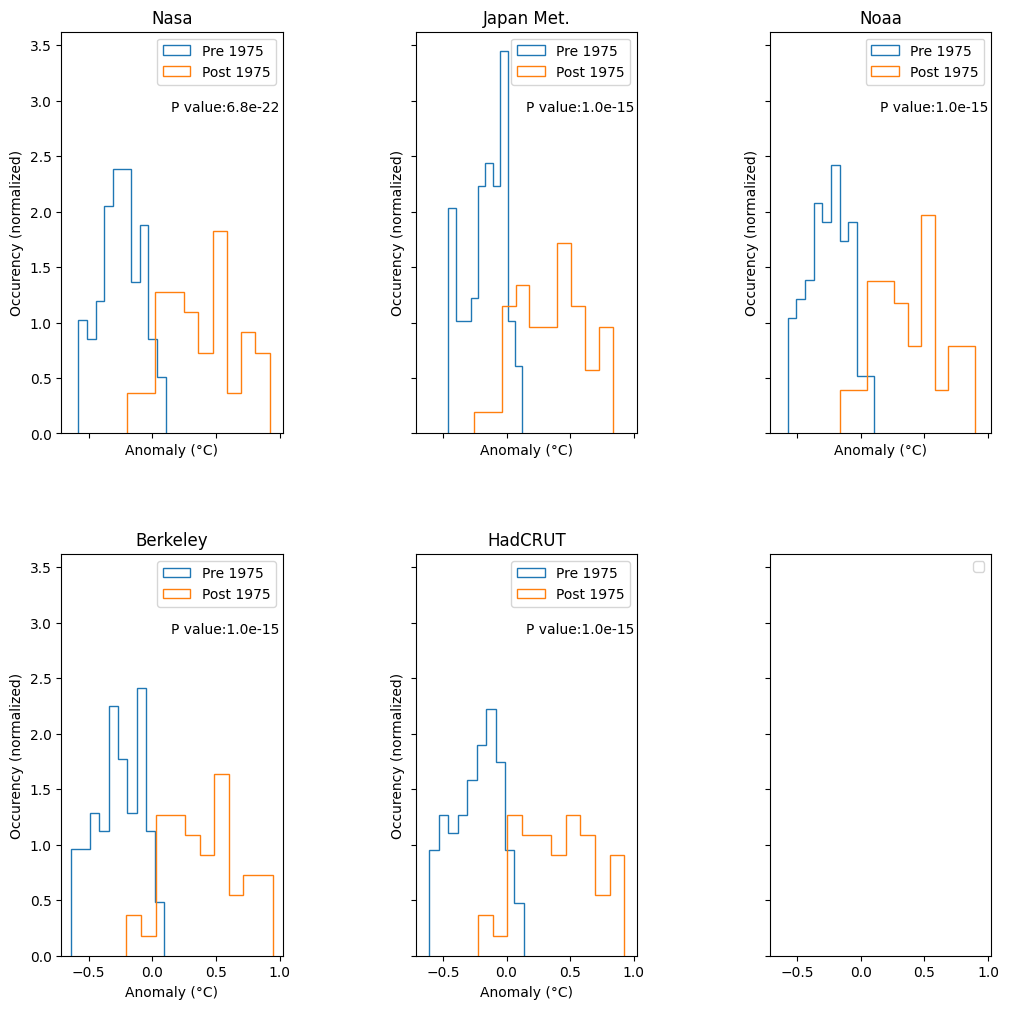

In [78]:
fig  , axs = plt.subplots(2 , 3  , sharex=True  , sharey=True)
#Noaa
axs[0,2].hist(Noaa_pre.iloc[: ,1]  , density = True , label = "Pre 1975"  , histtype="step")
axs[0,2].hist(Noaa_post.iloc[: ,1] , density = True ,  label = "Post 1975", histtype="step")
axs[0,2].set_title("Noaa")
axs[0,2].set_xlabel("Anomaly (°C)")
axs[0,2].set_ylabel("Occurency (normalized)")
axs[0,2].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Noaa_pre.iloc[: ,1] , Noaa_post.iloc[:, 1])[1])) ,ha = 'right' ,  verticalalignment = 'top')
axs[0,2].legend()

#Nasa
axs[0,0].hist(Nasa_pre.iloc[: ,1]  , density = True , label = "Pre 1975"  , histtype="step")
axs[0,0].hist(Nasa_post.iloc[:, 1] , density = True , label = "Post 1975" , histtype="step")
axs[0,0].set_title("Nasa")
axs[0,0].set_xlabel("Anomaly (°C)")
axs[0,0].set_ylabel("Occurency (normalized)")
axs[0,0].text(1 ,3, 'P value:' + str('{:.1e}'.format(st.ks_2samp(Nasa_pre.iloc[: ,1], Nasa_post.iloc[:, 1])[1])) ,  ha = 'right'  , verticalalignment = 'top')
axs[0,0].legend()

#Japan
axs[0,1].hist(Japan_pre.iloc[: ,1] ,  density = True , label = "Pre 1975"  , histtype="step")
axs[0,1].hist(Japan_post.iloc[:, 1],  density = True , label = "Post 1975" , histtype="step")
axs[0,1].set_title("Japan Met.")
axs[0,1].set_xlabel("Anomaly (°C)")
axs[0,1].set_ylabel("Occurency (normalized)")
axs[0,1].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Japan_pre.iloc[:, 1], Japan_post.iloc[:, 1])[1]))  , ha = 'right'  , verticalalignment = 'top')
axs[0,1].legend()

#Had
axs[1,1].hist(Had_pre.iloc[: ,1]  ,  density = True ,  label = "Pre 1975" , histtype="step")
axs[1,1].hist(Had_post.iloc[:, 1] ,  density = True ,  label = "Post 1975", histtype="step")
axs[1,1].set_title("HadCRUT")
axs[1,1].set_xlabel("Anomaly (°C)")
axs[1,1].set_ylabel("Occurency (normalized)")
axs[1,1].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Had_pre.iloc[:, 1], Had_post.iloc[: ,1])[1])) ,  ha = 'right'  , verticalalignment = 'top')
axs[1,1].legend()

#Berkeley
axs[1,0].hist(Berkeley_pre.iloc[: ,1]  ,  density = True , label = "Pre 1975"  , histtype="step")
axs[1,0].hist(Berkeley_post.iloc[:, 1] ,  density = True , label = "Post 1975" , histtype="step")
axs[1,0].set_title("Berkeley")
axs[1,0].set_xlabel("Anomaly (°C)")
axs[1,0].set_ylabel("Occurency (normalized)")
axs[1,0].text(1 ,3, 'P value:' + str('{:.1e}'.format(st.ks_2samp(Berkeley_pre.iloc[:, 1], Berkeley_post.iloc[: ,1])[1])) ,  ha = 'right'   ,verticalalignment = 'top')
axs[1,0].legend()

#Tutto insieme
#axs[1,2].hist(Berkeley_fixed['Annual Anomaly'] ,  density = True  , histtype="step" ,  label = "Berkeley" ,  color = 'red')
#axs[1,2].hist(Had_fixed['Anomaly (deg C)']  , density = True,   histtype="step"  , label = "HadCRUT" ,  color = 'brown')
#axs[1,2].hist(Japan_fixed['Global'],   density = True,   histtype="step",  label = "Japan" ,  color = 'purple')
#axs[1,2].hist(Nasa_fixed['Median'] ,  density = True , histtype="step"  , label = "Nasa"   ,color = 'green')
#axs[1,2].hist(Noaa_fixed['Value']  , density = True  ,histtype = "step" ,  label = "Noaa"  , color = 'y')
#axs[1,2].set_xlabel("Anomaly (°C)")
#axs[1,2].set_ylabel("Occurency (normalized)")
#axs[1,2].legend(bbox_to_anchor = (0.1 ,0.1))


fig.subplots_adjust(hspace=0.3 , wspace=0.6)
plt.legend()
plt.rcParams['figure.figsize'] = [12, 12]

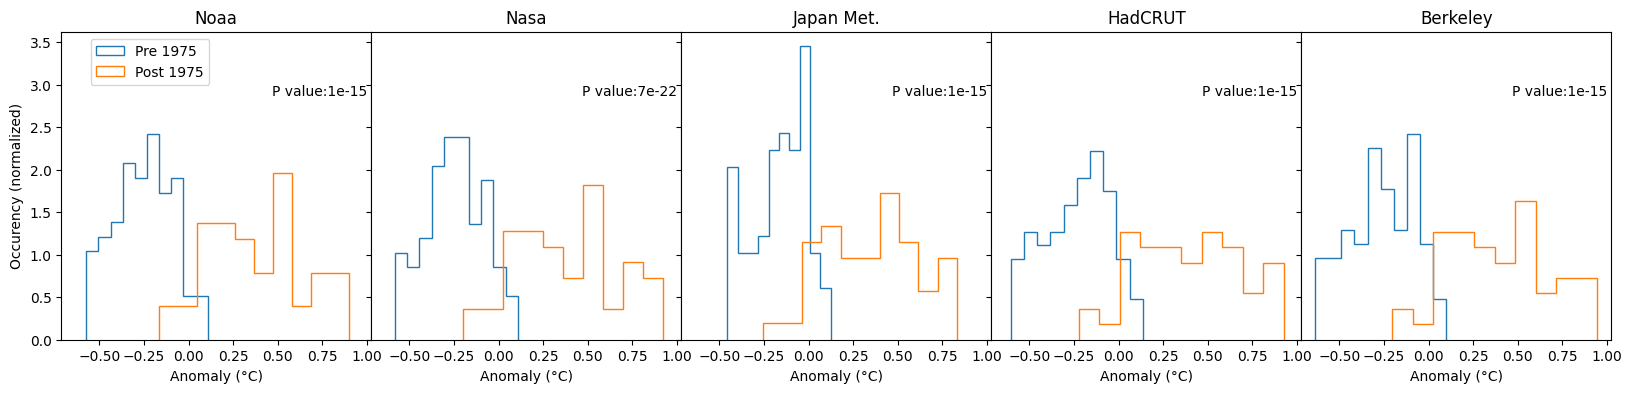

In [111]:
fig  , axs = plt.subplots(1,5  , sharex=True  , sharey=True)
#Noaa
axs[0].hist(Noaa_pre.iloc[: ,1]   , density = True , label = "Pre 1975" , histtype="step")
axs[0].hist(Noaa_post.iloc[: ,1]  , density = True , label = "Post 1975", histtype="step")
axs[0].set_title("Noaa")
axs[0].set_xlabel("Anomaly (°C)")
axs[0].set_ylabel("Occurency (normalized)")
axs[0].text(1, 3 ,'P value:' + str('{:.0e}'.format(st.ks_2samp(Noaa_pre.iloc[: ,1] , Noaa_post.iloc[:, 1])[1])) ,ha = 'right' ,  verticalalignment = 'top')
axs[0].legend(bbox_to_anchor = (0.5,1))

#Nasa
axs[1].hist(Nasa_pre.iloc[: ,1]  , density = True , label = "Pre 1975"  , histtype="step")
axs[1].hist(Nasa_post.iloc[:, 1] , density = True , label = "Post 1975" , histtype="step")
axs[1].set_title("Nasa")
axs[1].set_xlabel("Anomaly (°C)")
axs[1].text(1 ,3, 'P value:' + str('{:.0e}'.format(st.ks_2samp(Nasa_pre.iloc[: ,1], Nasa_post.iloc[:, 1])[1])) ,  ha = 'right'  , verticalalignment = 'top')


#Japan
axs[2].hist(Japan_pre.iloc[: ,1] ,  density = True , label = "Pre 1975"  , histtype="step")
axs[2].hist(Japan_post.iloc[:, 1],  density = True , label = "Post 1975" , histtype="step")
axs[2].set_title("Japan Met.")
axs[2].set_xlabel("Anomaly (°C)")
axs[2].text(1, 3 ,'P value:' + str('{:.0e}'.format(st.ks_2samp(Japan_pre.iloc[:, 1], Japan_post.iloc[:, 1])[1]))  , ha = 'right'  , verticalalignment = 'top')


#Had
axs[3].hist(Had_pre.iloc[: ,1]  ,  density = True , label = "Pre 1975"  , histtype="step")
axs[3].hist(Had_post.iloc[:, 1] ,  density = True , label = "Post 1975" , histtype="step")
axs[3].set_title("HadCRUT")
axs[3].set_xlabel("Anomaly (°C)")
axs[3].text(1, 3 ,'P value:' + str('{:.0e}'.format(st.ks_2samp(Had_pre.iloc[:, 1], Had_post.iloc[: ,1])[1])) ,  ha = 'right'  , verticalalignment = 'top')

#Berkeley
axs[4].hist(Berkeley_pre.iloc[:,1]  , density = True , label = "Pre 1975"  , histtype="step")
axs[4].hist(Berkeley_post.iloc[:,1] , density = True , label = "Post 1975" , histtype="step")
axs[4].set_title("Berkeley")
axs[4].set_xlabel("Anomaly (°C)")
axs[4].text(1 ,3, 'P value:' + str('{:.0e}'.format(st.ks_2samp(Berkeley_pre.iloc[:, 1], Berkeley_post.iloc[: ,1])[1])) ,  ha = 'right'   ,verticalalignment = 'top')

fig.subplots_adjust(hspace=0.3 , wspace=0)
plt.rcParams['figure.figsize'] = [20, 4]

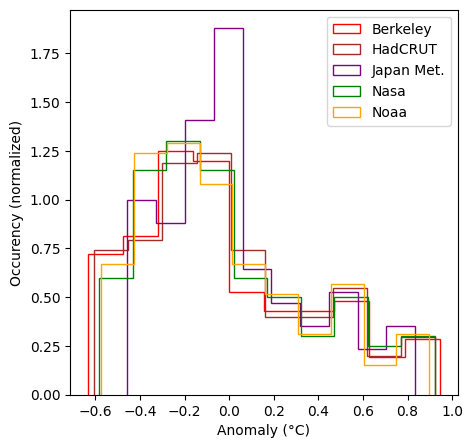

In [121]:
#Tutto insieme
plt.hist(Berkeley_fixed['Annual Anomaly'] ,  density = True  , histtype="step" ,  label = "Berkeley" ,  color = 'red')
plt.hist(Had_fixed['Anomaly (deg C)']  , density = True,   histtype="step"  , label = "HadCRUT" ,  color = 'brown')
plt.hist(Japan_fixed['Global'],   density = True,   histtype="step",  label = "Japan Met." ,  color = 'purple')
plt.hist(Nasa_fixed['Median'] ,  density = True , histtype="step"  , label = "Nasa"   ,color = 'green')
plt.hist(Noaa_fixed['Value']  , density = True  ,histtype = "step" ,  label = "Noaa"  , color = 'orange')
plt.xlabel("Anomaly (°C)")
plt.ylabel("Occurency (normalized)")
plt.legend()
plt.rcParams['figure.figsize'] = [5, 5]

In [75]:
def protocollo_di_Kyoto(data) : 
    filtro_pre = data[data.iloc[:,0] > 1997].index
    pre = data.drop(filtro_pre)

    filtro_post = data[data.iloc[:,0] < 1997].index
    post = data.drop(filtro_post)

    return pre,post


In [76]:
Had_pre_Kyoto   ,Had_post_Kyoto = protocollo_di_Kyoto(Berkeley_post)
Noaa_pre_Kyoto  , Noaa_post_Kyoto = protocollo_di_Kyoto(Berkeley_post)
Japan_pre_Kyoto ,  Japan_post_Kyoto = protocollo_di_Kyoto(Berkeley_post)
Nasa_pre_Kyoto  , Nasa_post_Kyoto = protocollo_di_Kyoto(Berkeley_post)
Berkeley_pre_Kyoto  ,  Berkeley_post_Kyoto = protocollo_di_Kyoto(Berkeley_post)

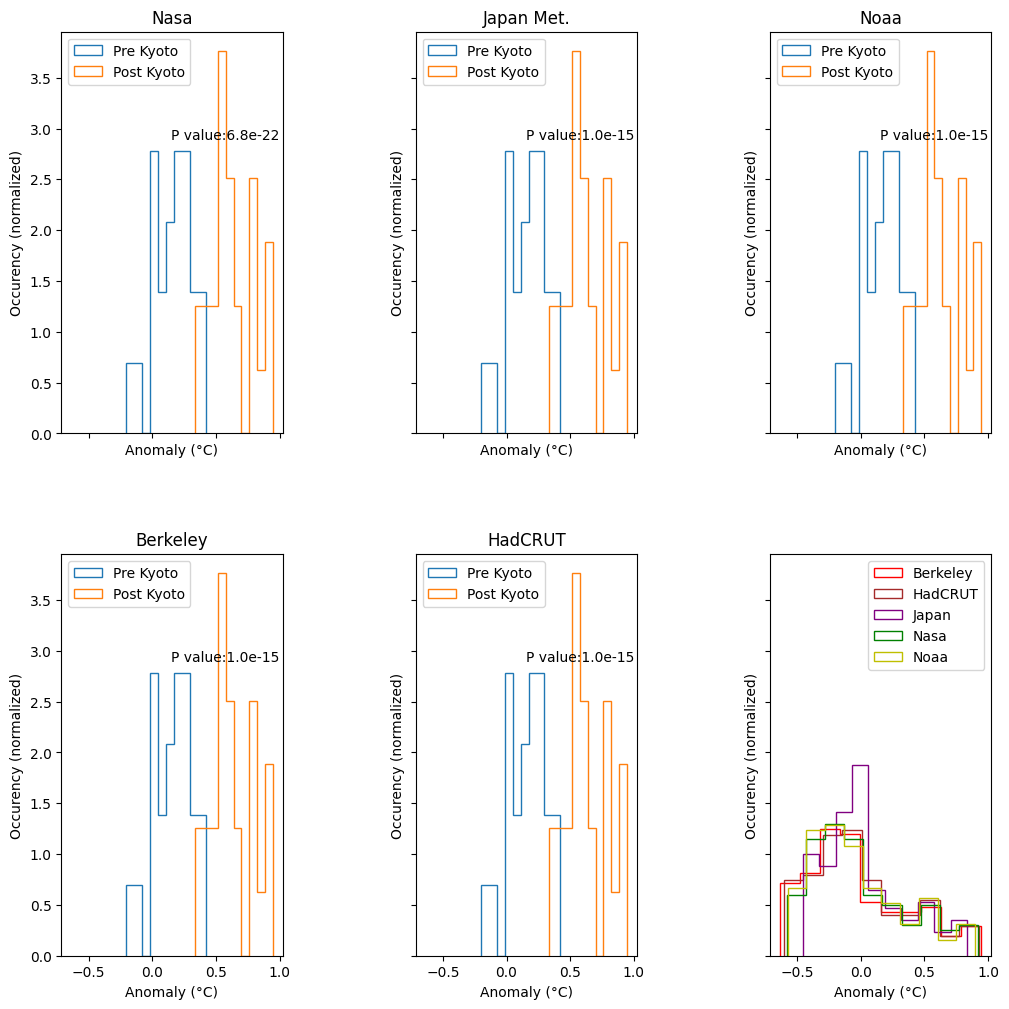

In [77]:
fig  , axs = plt.subplots(2 , 3  , sharex=True  , sharey=True)
#Noaa
axs[0,2].hist(Noaa_pre_Kyoto.iloc[: ,1]   ,density = True  , label = "Pre Kyoto"  , histtype="step")
axs[0,2].hist(Noaa_post_Kyoto.iloc[: ,1]  , density = True ,  label = "Post Kyoto",   histtype="step")
axs[0,2].set_title("Noaa")
axs[0,2].set_xlabel("Anomaly (°C)")
axs[0,2].set_ylabel("Occurency (normalized)")
axs[0,2].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Noaa_pre.iloc[: ,1] , Noaa_post.iloc[:, 1])[1])) ,ha = 'right' ,  verticalalignment = 'top')
axs[0,2].legend()

#Nasa
axs[0,0].hist(Nasa_pre_Kyoto.iloc[: ,1]  , density = True  , label = "Pre Kyoto"   ,histtype="step")
axs[0,0].hist(Nasa_post_Kyoto.iloc[:, 1] ,  density = True ,  label = "Post Kyoto" , histtype="step")
axs[0,0].set_title("Nasa")
axs[0,0].set_xlabel("Anomaly (°C)")
axs[0,0].set_ylabel("Occurency (normalized)")
axs[0,0].text(1 ,3, 'P value:' + str('{:.1e}'.format(st.ks_2samp(Nasa_pre.iloc[: ,1], Nasa_post.iloc[:, 1])[1])) ,  ha = 'right'  , verticalalignment = 'top')
axs[0,0].legend()

#Japan
axs[0,1].hist(Japan_pre_Kyoto.iloc[: ,1] ,  density = True  , label = "Pre Kyoto"   ,histtype="step")
axs[0,1].hist(Japan_post_Kyoto.iloc[:, 1],   density = True ,  label = "Post Kyoto" ,  histtype="step")
axs[0,1].set_title("Japan Met.")
axs[0,1].set_xlabel("Anomaly (°C)")
axs[0,1].set_ylabel("Occurency (normalized)")
axs[0,1].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Japan_pre.iloc[:, 1], Japan_post.iloc[:, 1])[1]))  , ha = 'right'  , verticalalignment = 'top')
axs[0,1].legend()

#Had
axs[1,1].hist(Had_pre_Kyoto.iloc[: ,1]  , density = True  , label = "Pre Kyoto"  ,histtype="step")
axs[1,1].hist(Had_post_Kyoto.iloc[:, 1] ,  density = True ,  label = "Post Kyoto",   histtype="step")
axs[1,1].set_title("HadCRUT")
axs[1,1].set_xlabel("Anomaly (°C)")
axs[1,1].set_ylabel("Occurency (normalized)")
axs[1,1].text(1, 3 ,'P value:' + str('{:.1e}'.format(st.ks_2samp(Had_pre.iloc[:, 1], Had_post.iloc[: ,1])[1])) ,  ha = 'right'  , verticalalignment = 'top')
axs[1,1].legend()

#Berkeley
axs[1,0].hist(Berkeley_pre_Kyoto.iloc[: ,1]  , density = True ,  label = "Pre Kyoto"  ,histtype="step")
axs[1,0].hist(Berkeley_post_Kyoto.iloc[:, 1] ,  density = True,   label = "Post Kyoto",   histtype="step")
axs[1,0].set_title("Berkeley")
axs[1,0].set_xlabel("Anomaly (°C)")
axs[1,0].set_ylabel("Occurency (normalized)")
axs[1,0].text(1 ,3, 'P value:' + str('{:.1e}'.format(st.ks_2samp(Berkeley_pre.iloc[:,1], Berkeley_post.iloc[: , 1])[1])) ,  ha = 'right'   ,verticalalignment = 'top')
axs[1,0].legend()

#Tutto insieme
axs[1,2].hist(Berkeley_fixed['Annual Anomaly'] ,  density = True  , histtype="step" ,  label = "Berkeley" ,  color = 'red')
axs[1,2].hist(Had_fixed['Anomaly (deg C)']  , density = True,   histtype="step"  , label = "HadCRUT" ,  color = 'brown')
axs[1,2].hist(Japan_fixed['Global'],   density = True,   histtype="step",  label = "Japan" ,  color = 'purple')
axs[1,2].hist(Nasa_fixed['Median'] ,  density = True , histtype="step"  , label = "Nasa"   ,color = 'green')
axs[1,2].hist(Noaa_fixed['Value']  , density = True  ,histtype = "step" ,  label = "Noaa"  , color = 'y')
axs[1,2].set_xlabel("Anomaly (°C)")
axs[1,2].set_ylabel("Occurency (normalized)")
axs[1,2].legend(bbox_to_anchor = (0.1 ,0.1))


fig.subplots_adjust(hspace=0.3 , wspace=0.6)
plt.legend()
plt.rcParams['figure.figsize'] = [12, 12]